### regression 예시_boston_housing

In [1]:
# 함수이름=용어
# model.fit=train (훈련)
# evaluate=test (이때, test를 위해서 데이터를 남겨둠.)
# predict=infer (입력을 넣었을 때, 결과값을 리턴. 상품화)

In [2]:
# hidden layer를 추가 -> 성능 향상(target(정답)과 output 간의 점점 차이가 줄어듦)
# 성능에 영향을 미치는 요소 
       # hidden layer의 수, hidden layer의 노드수, epochs, activation(non-linearity를 input layer을 제외한 다른 layer에 부여 가능)
#  activation의 대표적인 예(sigmoid와 tanh는 squash function이라고도 함)
        #선택적_sigmoid(모든 값들을 0과 1 사이로 압축. [0,1]), 
                #tanh([-1,1]로 압축)
                #relu(음수는 0, 양수는 그대로)
                #soft max(값들의 총합이 1이 되도록 만듦. 자기 자신/총합. 확률화)
        #마지막 layer에 sigmoid를 하면, 0과 1 사이의 값으로. -> 선택 보기가 두 개(binary)
        #마지막 layer에 soft max를 하면, 확률적으로 -> 선택 보기가 여러 개(multiple choice)
# weight는 matrix, 입력 출력 데이터는 벡터

In [3]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape #1 생략=벡터

((404, 13), (404,), (102, 13), (102,))

In [15]:
x_train[:3] #대괄호 2개

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [16]:
len(x_train), len(x_train[0]) # 13개의 벡터가 총 404개

(404, 13)

In [21]:
y_train[:20] #대괄호 1개 

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5])

In [23]:
len(y_train) #x_train과 y_train의 길이는 같음

404

In [ ]:
#좋은 데이터인지 확인하기 위해 plot을 할 필요가 있음. (시각화)
#plot을 할 때 13개를 모두 할 수 없음. 그래서 plt.plot(x_train[:,0], y_train,'.') #y는 집값. x축은 crim의 퍼센트. -> non-linearity
#인덱스를 1로 잡으면 zn #for 구문으로 인덱싱을 +1

In [28]:
x_train[:,0][:10]

array([1.23247, 0.02177, 4.89822, 0.03961, 3.69311, 0.28392, 9.18702,
       4.0974 , 2.15505, 1.62864])

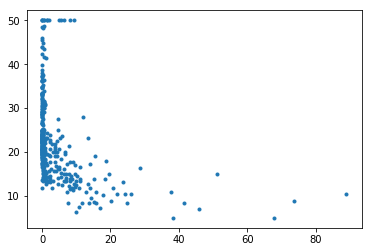

In [30]:
plt.plot(x_train[:,0], y_train,'.') #x_train[:,0]는, array 안의 모든 리스트의 첫번째 원소를 모은 것.

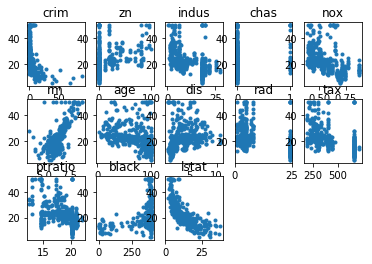

In [29]:
boston_housing=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i],y_train,'.')
    plt.title(boston_housing[i])
plt.show()

In [31]:
model = Sequential()
# model.add(Dense(1, input_shape=[13])) 
model.add(Dense(10, input_shape=[13],activation='relu')) #출력부 수정, hidden layer(하나)의 노드수=10 #비선형성 부여 
#linearity보다 ㅣoss를 더 줄일 수 있음. 
model.add(Dense(1)) #마지막은 하나 
model.compile(optimizer='rmsprop', loss='mse')
model.summary()
#paran #(=화살표의 개수)가 왜 14? 훈련해야 할 weight의 수. b도 있기 때문
#paran #(=화살표의 개수)가 왜 140? 14(인풋의 개수)*10(아웃풋=hidden layer의 노드의 수)
#paran #(=화살표의 개수)가 왜 11? 11(hiddenlayer의 인풋 개수)*1(아웃풋 하나)

# output에서 activation을 부여
    #regression 일 때는 x, classification일 때는 sigmoid나 soft max
    #이 예시는 regression이기 때문에 아무것도 적지 않음.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, epochs=1000) #loss가 줄어듦

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
404/404 [==============================] - 0s 933us/sample - loss: 41007.3435
Epoch 2/1000
404/404 [==============================] - 0s 79us/sample - loss: 24635.7203
Epoch 3/1000
404/404 [==============================] - 0s 109us/sample - loss: 14387.7414
Epoch 4/1000
404/404 [==============================] - 0s 124us/sample - loss: 7621.4451
Epoch 5/1000
404/404 [==============================] - 0s 129us/sample - loss: 3464.1736
Epoch 6/1000
404/404 [==============================] - 0s 87us/sample - loss: 1330.5977
Epoch 7/1000
404/404 [==============================] - 0s 203us/sample - loss: 562.7648
Epoch 8/1000
404/404 [==============================] - 0s 106us/sample - loss: 359.2570
Epoch 9/1000
404/404 [==============================] - 0s 119us/sample - loss: 261.9128
Epoch 10/1000
404/404 [==============================] - 0s 119us/sample - loss: 207.4737
Epoch 11/1000
404/404 [==============================]

404/404 [==============================] - 0s 67us/sample - loss: 48.7914
Epoch 91/1000
404/404 [==============================] - 0s 57us/sample - loss: 51.6409
Epoch 92/1000
404/404 [==============================] - 0s 99us/sample - loss: 50.8332
Epoch 93/1000
404/404 [==============================] - 0s 52us/sample - loss: 49.4642
Epoch 94/1000
404/404 [==============================] - 0s 52us/sample - loss: 47.9371
Epoch 95/1000
404/404 [==============================] - 0s 54us/sample - loss: 51.1699
Epoch 96/1000
404/404 [==============================] - 0s 54us/sample - loss: 48.4436
Epoch 97/1000
404/404 [==============================] - 0s 52us/sample - loss: 48.5351
Epoch 98/1000
404/404 [==============================] - 0s 52us/sample - loss: 50.5909
Epoch 99/1000
404/404 [==============================] - 0s 54us/sample - loss: 49.4775
Epoch 100/1000
404/404 [==============================] - 0s 49us/sample - loss: 46.6745
Epoch 101/1000
404/404 [=====================

404/404 [==============================] - 0s 54us/sample - loss: 39.3319
Epoch 182/1000
404/404 [==============================] - 0s 82us/sample - loss: 39.7100
Epoch 183/1000
404/404 [==============================] - 0s 49us/sample - loss: 40.9367
Epoch 184/1000
404/404 [==============================] - 0s 52us/sample - loss: 42.3907
Epoch 185/1000
404/404 [==============================] - 0s 47us/sample - loss: 41.7202
Epoch 186/1000
404/404 [==============================] - 0s 57us/sample - loss: 40.9048
Epoch 187/1000
404/404 [==============================] - 0s 57us/sample - loss: 41.8059
Epoch 188/1000
404/404 [==============================] - 0s 52us/sample - loss: 40.4998
Epoch 189/1000
404/404 [==============================] - 0s 59us/sample - loss: 40.8428
Epoch 190/1000
404/404 [==============================] - 0s 52us/sample - loss: 41.8682
Epoch 191/1000
404/404 [==============================] - 0s 59us/sample - loss: 42.9691
Epoch 192/1000
404/404 [============

Epoch 273/1000
404/404 [==============================] - 0s 52us/sample - loss: 38.4043
Epoch 274/1000
404/404 [==============================] - 0s 59us/sample - loss: 39.8045
Epoch 275/1000
404/404 [==============================] - 0s 62us/sample - loss: 38.4362
Epoch 276/1000
404/404 [==============================] - 0s 54us/sample - loss: 38.8288
Epoch 277/1000
404/404 [==============================] - 0s 49us/sample - loss: 35.8023
Epoch 278/1000
404/404 [==============================] - 0s 54us/sample - loss: 36.8496
Epoch 279/1000
404/404 [==============================] - 0s 72us/sample - loss: 41.0575
Epoch 280/1000
404/404 [==============================] - 0s 54us/sample - loss: 37.5576
Epoch 281/1000
404/404 [==============================] - 0s 59us/sample - loss: 39.3597
Epoch 282/1000
404/404 [==============================] - 0s 59us/sample - loss: 35.9401
Epoch 283/1000
404/404 [==============================] - 0s 54us/sample - loss: 37.5460
Epoch 284/1000
404/40

404/404 [==============================] - 0s 62us/sample - loss: 36.8869
Epoch 366/1000
404/404 [==============================] - 0s 54us/sample - loss: 34.4923
Epoch 367/1000
404/404 [==============================] - 0s 57us/sample - loss: 33.7076
Epoch 368/1000
404/404 [==============================] - 0s 62us/sample - loss: 34.6279
Epoch 369/1000
404/404 [==============================] - 0s 57us/sample - loss: 35.6808
Epoch 370/1000
404/404 [==============================] - 0s 54us/sample - loss: 37.5743
Epoch 371/1000
404/404 [==============================] - 0s 54us/sample - loss: 32.4209
Epoch 372/1000
404/404 [==============================] - 0s 54us/sample - loss: 33.3150
Epoch 373/1000
404/404 [==============================] - 0s 79us/sample - loss: 34.0068
Epoch 374/1000
404/404 [==============================] - 0s 69us/sample - loss: 36.5685
Epoch 375/1000
404/404 [==============================] - 0s 52us/sample - loss: 33.7540
Epoch 376/1000
404/404 [============

404/404 [==============================] - 0s 64us/sample - loss: 36.3649
Epoch 458/1000
404/404 [==============================] - 0s 54us/sample - loss: 33.6553
Epoch 459/1000
404/404 [==============================] - 0s 49us/sample - loss: 32.8513
Epoch 460/1000
404/404 [==============================] - 0s 72us/sample - loss: 31.9456
Epoch 461/1000
404/404 [==============================] - 0s 54us/sample - loss: 34.3636
Epoch 462/1000
404/404 [==============================] - 0s 52us/sample - loss: 31.8321
Epoch 463/1000
404/404 [==============================] - 0s 49us/sample - loss: 32.6019
Epoch 464/1000
404/404 [==============================] - 0s 54us/sample - loss: 32.8934
Epoch 465/1000
404/404 [==============================] - 0s 49us/sample - loss: 31.9910
Epoch 466/1000
404/404 [==============================] - 0s 52us/sample - loss: 32.2788
Epoch 467/1000
404/404 [==============================] - 0s 54us/sample - loss: 30.1591
Epoch 468/1000
404/404 [============

404/404 [==============================] - 0s 57us/sample - loss: 32.3549
Epoch 550/1000
404/404 [==============================] - 0s 52us/sample - loss: 30.1959
Epoch 551/1000
404/404 [==============================] - 0s 54us/sample - loss: 30.3838
Epoch 552/1000
404/404 [==============================] - 0s 49us/sample - loss: 30.1406
Epoch 553/1000
404/404 [==============================] - 0s 54us/sample - loss: 31.0146
Epoch 554/1000
404/404 [==============================] - 0s 52us/sample - loss: 29.9823
Epoch 555/1000
404/404 [==============================] - 0s 84us/sample - loss: 30.1712
Epoch 556/1000
404/404 [==============================] - 0s 54us/sample - loss: 31.7659
Epoch 557/1000
404/404 [==============================] - 0s 59us/sample - loss: 30.6714
Epoch 558/1000
404/404 [==============================] - 0s 52us/sample - loss: 29.0971
Epoch 559/1000
404/404 [==============================] - 0s 54us/sample - loss: 30.6997
Epoch 560/1000
404/404 [============

404/404 [==============================] - 0s 52us/sample - loss: 30.4803
Epoch 641/1000
404/404 [==============================] - 0s 52us/sample - loss: 28.2611
Epoch 642/1000
404/404 [==============================] - 0s 52us/sample - loss: 27.2954
Epoch 643/1000
404/404 [==============================] - 0s 47us/sample - loss: 28.3987
Epoch 644/1000
404/404 [==============================] - 0s 59us/sample - loss: 30.6147
Epoch 645/1000
404/404 [==============================] - 0s 82us/sample - loss: 31.4299
Epoch 646/1000
404/404 [==============================] - 0s 84us/sample - loss: 27.5833
Epoch 647/1000
404/404 [==============================] - 0s 52us/sample - loss: 30.2674
Epoch 648/1000
404/404 [==============================] - 0s 52us/sample - loss: 28.7896
Epoch 649/1000
404/404 [==============================] - 0s 52us/sample - loss: 28.7089
Epoch 650/1000
404/404 [==============================] - 0s 49us/sample - loss: 29.5208
Epoch 651/1000
404/404 [============

404/404 [==============================] - 0s 52us/sample - loss: 30.3782
Epoch 733/1000
404/404 [==============================] - 0s 57us/sample - loss: 27.5585
Epoch 734/1000
404/404 [==============================] - 0s 64us/sample - loss: 28.4993
Epoch 735/1000
404/404 [==============================] - 0s 62us/sample - loss: 29.5448
Epoch 736/1000
404/404 [==============================] - 0s 57us/sample - loss: 28.4011
Epoch 737/1000
404/404 [==============================] - 0s 57us/sample - loss: 27.7873
Epoch 738/1000
404/404 [==============================] - 0s 54us/sample - loss: 29.3175
Epoch 739/1000
404/404 [==============================] - 0s 47us/sample - loss: 30.3881
Epoch 740/1000
404/404 [==============================] - 0s 52us/sample - loss: 27.9174
Epoch 741/1000
404/404 [==============================] - 0s 54us/sample - loss: 28.2143
Epoch 742/1000
404/404 [==============================] - 0s 69us/sample - loss: 28.4475
Epoch 743/1000
404/404 [============

404/404 [==============================] - 0s 69us/sample - loss: 27.5123
Epoch 825/1000
404/404 [==============================] - 0s 59us/sample - loss: 28.1745
Epoch 826/1000
404/404 [==============================] - 0s 52us/sample - loss: 25.8299
Epoch 827/1000
404/404 [==============================] - 0s 54us/sample - loss: 27.0817
Epoch 828/1000
404/404 [==============================] - 0s 67us/sample - loss: 29.0072
Epoch 829/1000
404/404 [==============================] - 0s 84us/sample - loss: 25.5747
Epoch 830/1000
404/404 [==============================] - 0s 52us/sample - loss: 28.1500
Epoch 831/1000
404/404 [==============================] - 0s 52us/sample - loss: 29.5489
Epoch 832/1000
404/404 [==============================] - 0s 62us/sample - loss: 26.9656
Epoch 833/1000
404/404 [==============================] - 0s 72us/sample - loss: 27.4103
Epoch 834/1000
404/404 [==============================] - 0s 59us/sample - loss: 29.0004
Epoch 835/1000
404/404 [============

Epoch 916/1000
404/404 [==============================] - 0s 54us/sample - loss: 29.8531
Epoch 917/1000
404/404 [==============================] - 0s 49us/sample - loss: 27.7570
Epoch 918/1000
404/404 [==============================] - 0s 54us/sample - loss: 25.2770
Epoch 919/1000
404/404 [==============================] - 0s 52us/sample - loss: 27.5994
Epoch 920/1000
404/404 [==============================] - 0s 54us/sample - loss: 28.9814
Epoch 921/1000
404/404 [==============================] - 0s 49us/sample - loss: 26.9520
Epoch 922/1000
404/404 [==============================] - 0s 52us/sample - loss: 26.4536
Epoch 923/1000
404/404 [==============================] - 0s 54us/sample - loss: 26.2843
Epoch 924/1000
404/404 [==============================] - 0s 62us/sample - loss: 27.3301
Epoch 925/1000
404/404 [==============================] - 0s 64us/sample - loss: 26.7231
Epoch 926/1000
404/404 [==============================] - 0s 54us/sample - loss: 27.3466
Epoch 927/1000
404/40

In [33]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 862us/sample - loss: 24.4178


24.417826334635418

In [34]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


In [41]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2.  zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[-104.50906]], dtype=float32)

In [57]:
model_=Sequential()
model_.add(Dense(10, input_shape=[13],activation='relu')) 
model_.add(Dense(20,activation='relu')) 
model_.add(Dense(30,activation='relu')) 
model_.add(Dense(40,activation='relu')) 
model_.add(Dense(50,activation='relu')) 
model_.add(Dense(60,activation='relu')) 
model_.add(Dense(70,activation='relu')) 
model_.add(Dense(1))
model_.compile(optimizer='rmsprop', loss='mse')
model_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_33 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_35 (Dense)             (None, 60)                3060      
_________________________________________________________________
dense_36 (Dense)             (None, 70)                4270      
__________

In [58]:
model_.fit(x_train, y_train, epochs=7000) 

Epoch 1/7000
404/404 [==============================] - 1s 2ms/sample - loss: 186.9602
Epoch 2/7000
404/404 [==============================] - 0s 146us/sample - loss: 83.7672
Epoch 3/7000
404/404 [==============================] - 0s 242us/sample - loss: 77.8892
Epoch 4/7000
404/404 [==============================] - 0s 163us/sample - loss: 73.6823
Epoch 5/7000
404/404 [==============================] - 0s 198us/sample - loss: 74.1605
Epoch 6/7000
404/404 [==============================] - 0s 200us/sample - loss: 69.6100
Epoch 7/7000
404/404 [==============================] - 0s 223us/sample - loss: 78.0741
Epoch 8/7000
404/404 [==============================] - 0s 235us/sample - loss: 68.4059
Epoch 9/7000
404/404 [==============================] - 0s 168us/sample - loss: 71.0325
Epoch 10/7000
404/404 [==============================] - 0s 151us/sample - loss: 68.3024
Epoch 11/7000
404/404 [==============================] - 0s 188us/sample - loss: 68.0100
Epoch 12/7000
404/404 [========

404/404 [==============================] - 0s 230us/sample - loss: 39.7037
Epoch 94/7000
404/404 [==============================] - 0s 109us/sample - loss: 42.2064
Epoch 95/7000
404/404 [==============================] - 0s 116us/sample - loss: 42.6173
Epoch 96/7000
404/404 [==============================] - 0s 139us/sample - loss: 40.1285
Epoch 97/7000
404/404 [==============================] - 0s 131us/sample - loss: 40.4453
Epoch 98/7000
404/404 [==============================] - 0s 92us/sample - loss: 43.6434
Epoch 99/7000
404/404 [==============================] - 0s 84us/sample - loss: 34.9326
Epoch 100/7000
404/404 [==============================] - 0s 156us/sample - loss: 42.0078
Epoch 101/7000
404/404 [==============================] - 0s 101us/sample - loss: 36.8404
Epoch 102/7000
404/404 [==============================] - 0s 114us/sample - loss: 39.2288
Epoch 103/7000
404/404 [==============================] - 0s 119us/sample - loss: 39.9489
Epoch 104/7000
404/404 [=========

404/404 [==============================] - 0s 84us/sample - loss: 28.0871
Epoch 185/7000
404/404 [==============================] - 0s 92us/sample - loss: 19.4124
Epoch 186/7000
404/404 [==============================] - 0s 119us/sample - loss: 19.2156
Epoch 187/7000
404/404 [==============================] - 0s 119us/sample - loss: 22.8045
Epoch 188/7000
404/404 [==============================] - 0s 124us/sample - loss: 21.7318
Epoch 189/7000
404/404 [==============================] - 0s 99us/sample - loss: 22.0066
Epoch 190/7000
404/404 [==============================] - 0s 89us/sample - loss: 20.2367
Epoch 191/7000
404/404 [==============================] - 0s 84us/sample - loss: 20.0415
Epoch 192/7000
404/404 [==============================] - 0s 89us/sample - loss: 21.2646
Epoch 193/7000
404/404 [==============================] - 0s 94us/sample - loss: 17.8277
Epoch 194/7000
404/404 [==============================] - 0s 96us/sample - loss: 22.9144
Epoch 195/7000
404/404 [=========

404/404 [==============================] - 0s 104us/sample - loss: 11.2942
Epoch 276/7000
404/404 [==============================] - 0s 82us/sample - loss: 17.8347
Epoch 277/7000
404/404 [==============================] - 0s 99us/sample - loss: 19.5109
Epoch 278/7000
404/404 [==============================] - ETA: 0s - loss: 4.980 - 0s 92us/sample - loss: 14.3500
Epoch 279/7000
404/404 [==============================] - 0s 94us/sample - loss: 18.6016
Epoch 280/7000
404/404 [==============================] - 0s 89us/sample - loss: 21.7054
Epoch 281/7000
404/404 [==============================] - 0s 104us/sample - loss: 13.5726
Epoch 282/7000
404/404 [==============================] - 0s 92us/sample - loss: 19.9348
Epoch 283/7000
404/404 [==============================] - 0s 124us/sample - loss: 15.7948
Epoch 284/7000
404/404 [==============================] - 0s 143us/sample - loss: 11.4401
Epoch 285/7000
404/404 [==============================] - 0s 99us/sample - loss: 15.6005
Epoch 28

404/404 [==============================] - 0s 79us/sample - loss: 12.6039
Epoch 367/7000
404/404 [==============================] - 0s 82us/sample - loss: 13.2282
Epoch 368/7000
404/404 [==============================] - 0s 92us/sample - loss: 14.2221
Epoch 369/7000
404/404 [==============================] - 0s 87us/sample - loss: 13.8398
Epoch 370/7000
404/404 [==============================] - 0s 106us/sample - loss: 12.8823
Epoch 371/7000
404/404 [==============================] - 0s 99us/sample - loss: 11.8346
Epoch 372/7000
404/404 [==============================] - 0s 84us/sample - loss: 9.6842
Epoch 373/7000
404/404 [==============================] - 0s 82us/sample - loss: 17.4540
Epoch 374/7000
404/404 [==============================] - 0s 82us/sample - loss: 9.7218
Epoch 375/7000
404/404 [==============================] - 0s 82us/sample - loss: 12.6837
Epoch 376/7000
404/404 [==============================] - 0s 106us/sample - loss: 11.2408
Epoch 377/7000
404/404 [============

404/404 [==============================] - 0s 84us/sample - loss: 15.0698
Epoch 458/7000
404/404 [==============================] - 0s 89us/sample - loss: 9.3992
Epoch 459/7000
404/404 [==============================] - 0s 89us/sample - loss: 16.3878
Epoch 460/7000
404/404 [==============================] - 0s 87us/sample - loss: 7.7375
Epoch 461/7000
404/404 [==============================] - 0s 94us/sample - loss: 10.3176
Epoch 462/7000
404/404 [==============================] - 0s 106us/sample - loss: 18.2497
Epoch 463/7000
404/404 [==============================] - 0s 89us/sample - loss: 7.8380
Epoch 464/7000
404/404 [==============================] - 0s 111us/sample - loss: 10.5787
Epoch 465/7000
404/404 [==============================] - 0s 94us/sample - loss: 15.1594
Epoch 466/7000
404/404 [==============================] - 0s 94us/sample - loss: 10.8208
Epoch 467/7000
404/404 [==============================] - 0s 92us/sample - loss: 8.2053
Epoch 468/7000
404/404 [==============

404/404 [==============================] - 0s 92us/sample - loss: 13.7427
Epoch 550/7000
404/404 [==============================] - 0s 87us/sample - loss: 14.3411
Epoch 551/7000
404/404 [==============================] - 0s 99us/sample - loss: 6.1984
Epoch 552/7000
404/404 [==============================] - 0s 109us/sample - loss: 12.8496
Epoch 553/7000
404/404 [==============================] - 0s 87us/sample - loss: 5.9965
Epoch 554/7000
404/404 [==============================] - 0s 84us/sample - loss: 12.5027
Epoch 555/7000
404/404 [==============================] - 0s 84us/sample - loss: 9.2891
Epoch 556/7000
404/404 [==============================] - 0s 77us/sample - loss: 7.8711
Epoch 557/7000
404/404 [==============================] - 0s 79us/sample - loss: 9.3477
Epoch 558/7000
404/404 [==============================] - 0s 84us/sample - loss: 9.7736
Epoch 559/7000
404/404 [==============================] - 0s 96us/sample - loss: 6.8491
Epoch 560/7000
404/404 [==================

Epoch 641/7000
404/404 [==============================] - 0s 119us/sample - loss: 7.4166
Epoch 642/7000
404/404 [==============================] - 0s 349us/sample - loss: 10.1207
Epoch 643/7000
404/404 [==============================] - 0s 235us/sample - loss: 8.4832
Epoch 644/7000
404/404 [==============================] - 0s 126us/sample - loss: 8.5879
Epoch 645/7000
404/404 [==============================] - 0s 96us/sample - loss: 8.9709
Epoch 646/7000
404/404 [==============================] - 0s 96us/sample - loss: 7.9262
Epoch 647/7000
404/404 [==============================] - 0s 89us/sample - loss: 6.5585
Epoch 648/7000
404/404 [==============================] - 0s 119us/sample - loss: 5.7281
Epoch 649/7000
404/404 [==============================] - 0s 99us/sample - loss: 12.4022
Epoch 650/7000
404/404 [==============================] - 0s 104us/sample - loss: 10.5366
Epoch 651/7000
404/404 [==============================] - 0s 92us/sample - loss: 9.1241
Epoch 652/7000
404/404 

Epoch 733/7000
404/404 [==============================] - 0s 94us/sample - loss: 8.7570
Epoch 734/7000
404/404 [==============================] - 0s 84us/sample - loss: 5.8639
Epoch 735/7000
404/404 [==============================] - 0s 99us/sample - loss: 11.2084
Epoch 736/7000
404/404 [==============================] - 0s 124us/sample - loss: 7.8338
Epoch 737/7000
404/404 [==============================] - 0s 178us/sample - loss: 5.6258
Epoch 738/7000
404/404 [==============================] - 0s 156us/sample - loss: 15.5958
Epoch 739/7000
404/404 [==============================] - 0s 126us/sample - loss: 5.4967
Epoch 740/7000
404/404 [==============================] - 0s 96us/sample - loss: 9.9012
Epoch 741/7000
404/404 [==============================] - 0s 96us/sample - loss: 6.1657
Epoch 742/7000
404/404 [==============================] - 0s 124us/sample - loss: 12.8469
Epoch 743/7000
404/404 [==============================] - 0s 129us/sample - loss: 6.2378
Epoch 744/7000
404/404 

Epoch 825/7000
404/404 [==============================] - 0s 109us/sample - loss: 12.6994
Epoch 826/7000
404/404 [==============================] - 0s 96us/sample - loss: 4.6004
Epoch 827/7000
404/404 [==============================] - 0s 94us/sample - loss: 6.6275
Epoch 828/7000
404/404 [==============================] - 0s 99us/sample - loss: 9.4598
Epoch 829/7000
404/404 [==============================] - 0s 101us/sample - loss: 5.3953
Epoch 830/7000
404/404 [==============================] - 0s 92us/sample - loss: 8.7846
Epoch 831/7000
404/404 [==============================] - 0s 119us/sample - loss: 5.0507
Epoch 832/7000
404/404 [==============================] - 0s 129us/sample - loss: 6.7641
Epoch 833/7000
404/404 [==============================] - 0s 111us/sample - loss: 6.2219
Epoch 834/7000
404/404 [==============================] - 0s 121us/sample - loss: 14.7790
Epoch 835/7000
404/404 [==============================] - 0s 109us/sample - loss: 5.1487
Epoch 836/7000
404/404 

404/404 [==============================] - 0s 210us/sample - loss: 5.8608
Epoch 918/7000
404/404 [==============================] - 0s 131us/sample - loss: 6.3126
Epoch 919/7000
404/404 [==============================] - 0s 173us/sample - loss: 7.5291
Epoch 920/7000
404/404 [==============================] - 0s 89us/sample - loss: 9.2991
Epoch 921/7000
404/404 [==============================] - 0s 106us/sample - loss: 6.1096
Epoch 922/7000
404/404 [==============================] - 0s 114us/sample - loss: 5.2082
Epoch 923/7000
404/404 [==============================] - 0s 119us/sample - loss: 13.8873
Epoch 924/7000
404/404 [==============================] - 0s 124us/sample - loss: 4.4449
Epoch 925/7000
404/404 [==============================] - 0s 129us/sample - loss: 6.9399
Epoch 926/7000
404/404 [==============================] - 0s 101us/sample - loss: 9.5090
Epoch 927/7000
404/404 [==============================] - 0s 114us/sample - loss: 4.8907
Epoch 928/7000
404/404 [============

404/404 [==============================] - 0s 111us/sample - loss: 9.6843
Epoch 1009/7000
404/404 [==============================] - 0s 111us/sample - loss: 3.7820
Epoch 1010/7000
404/404 [==============================] - 0s 131us/sample - loss: 9.4609
Epoch 1011/7000
404/404 [==============================] - 0s 121us/sample - loss: 4.0088
Epoch 1012/7000
404/404 [==============================] - 0s 116us/sample - loss: 4.5858
Epoch 1013/7000
404/404 [==============================] - 0s 101us/sample - loss: 7.2207
Epoch 1014/7000
404/404 [==============================] - 0s 99us/sample - loss: 4.5132
Epoch 1015/7000
404/404 [==============================] - 0s 121us/sample - loss: 4.8849
Epoch 1016/7000
404/404 [==============================] - 0s 101us/sample - loss: 8.7586
Epoch 1017/7000
404/404 [==============================] - 0s 136us/sample - loss: 5.0625
Epoch 1018/7000
404/404 [==============================] - 0s 193us/sample - loss: 5.2567
Epoch 1019/7000
404/404 [==

404/404 [==============================] - 0s 111us/sample - loss: 5.7635
Epoch 1100/7000
404/404 [==============================] - 0s 106us/sample - loss: 6.1682
Epoch 1101/7000
404/404 [==============================] - 0s 134us/sample - loss: 5.4276
Epoch 1102/7000
404/404 [==============================] - 0s 94us/sample - loss: 5.9434
Epoch 1103/7000
404/404 [==============================] - 0s 126us/sample - loss: 4.9012
Epoch 1104/7000
404/404 [==============================] - 0s 106us/sample - loss: 10.7021
Epoch 1105/7000
404/404 [==============================] - 0s 119us/sample - loss: 6.3003
Epoch 1106/7000
404/404 [==============================] - 0s 124us/sample - loss: 4.9022
Epoch 1107/7000
404/404 [==============================] - 0s 124us/sample - loss: 5.0289
Epoch 1108/7000
404/404 [==============================] - 0s 106us/sample - loss: 6.7664
Epoch 1109/7000
404/404 [==============================] - 0s 121us/sample - loss: 6.8970
Epoch 1110/7000
404/404 [=

404/404 [==============================] - 0s 111us/sample - loss: 6.8316
Epoch 1191/7000
404/404 [==============================] - 0s 106us/sample - loss: 9.4893
Epoch 1192/7000
404/404 [==============================] - 0s 114us/sample - loss: 3.4536
Epoch 1193/7000
404/404 [==============================] - 0s 101us/sample - loss: 6.0853
Epoch 1194/7000
404/404 [==============================] - 0s 124us/sample - loss: 5.7369
Epoch 1195/7000
404/404 [==============================] - 0s 131us/sample - loss: 4.8355
Epoch 1196/7000
404/404 [==============================] - 0s 139us/sample - loss: 4.9107
Epoch 1197/7000
404/404 [==============================] - 0s 124us/sample - loss: 8.6038
Epoch 1198/7000
404/404 [==============================] - 0s 106us/sample - loss: 4.1720
Epoch 1199/7000
404/404 [==============================] - 0s 188us/sample - loss: 3.1231
Epoch 1200/7000
404/404 [==============================] - 0s 134us/sample - loss: 10.2067
Epoch 1201/7000
404/404 [

404/404 [==============================] - 0s 109us/sample - loss: 3.4019
Epoch 1282/7000
404/404 [==============================] - 0s 106us/sample - loss: 5.6433
Epoch 1283/7000
404/404 [==============================] - 0s 111us/sample - loss: 4.7419
Epoch 1284/7000
404/404 [==============================] - 0s 136us/sample - loss: 8.7301
Epoch 1285/7000
404/404 [==============================] - 0s 104us/sample - loss: 5.2580
Epoch 1286/7000
404/404 [==============================] - 0s 84us/sample - loss: 5.2694
Epoch 1287/7000
404/404 [==============================] - 0s 124us/sample - loss: 4.9787
Epoch 1288/7000
404/404 [==============================] - 0s 173us/sample - loss: 8.0907
Epoch 1289/7000
404/404 [==============================] - 0s 101us/sample - loss: 3.8854
Epoch 1290/7000
404/404 [==============================] - 0s 104us/sample - loss: 3.6388
Epoch 1291/7000
404/404 [==============================] - 0s 126us/sample - loss: 3.9534
Epoch 1292/7000
404/404 [==

404/404 [==============================] - 0s 109us/sample - loss: 5.2733
Epoch 1373/7000
404/404 [==============================] - 0s 129us/sample - loss: 3.3125
Epoch 1374/7000
404/404 [==============================] - 0s 139us/sample - loss: 7.5482
Epoch 1375/7000
404/404 [==============================] - 0s 109us/sample - loss: 4.6701
Epoch 1376/7000
404/404 [==============================] - 0s 119us/sample - loss: 3.2803
Epoch 1377/7000
404/404 [==============================] - 0s 139us/sample - loss: 5.5183
Epoch 1378/7000
404/404 [==============================] - 0s 74us/sample - loss: 6.1729
Epoch 1379/7000
404/404 [==============================] - 0s 104us/sample - loss: 3.3238
Epoch 1380/7000
404/404 [==============================] - 0s 119us/sample - loss: 6.0463
Epoch 1381/7000
404/404 [==============================] - 0s 109us/sample - loss: 5.2181
Epoch 1382/7000
404/404 [==============================] - 0s 114us/sample - loss: 5.1644
Epoch 1383/7000
404/404 [==

404/404 [==============================] - 0s 109us/sample - loss: 3.2540
Epoch 1464/7000
404/404 [==============================] - 0s 143us/sample - loss: 5.0954
Epoch 1465/7000
404/404 [==============================] - 0s 121us/sample - loss: 14.1418
Epoch 1466/7000
404/404 [==============================] - 0s 119us/sample - loss: 4.5964
Epoch 1467/7000
404/404 [==============================] - 0s 87us/sample - loss: 3.1141
Epoch 1468/7000
404/404 [==============================] - 0s 99us/sample - loss: 3.8627
Epoch 1469/7000
404/404 [==============================] - 0s 106us/sample - loss: 6.0048
Epoch 1470/7000
404/404 [==============================] - 0s 101us/sample - loss: 6.0603
Epoch 1471/7000
404/404 [==============================] - 0s 96us/sample - loss: 3.9610
Epoch 1472/7000
404/404 [==============================] - 0s 106us/sample - loss: 3.7674
Epoch 1473/7000
404/404 [==============================] - 0s 94us/sample - loss: 4.9666
Epoch 1474/7000
404/404 [====

404/404 [==============================] - 0s 111us/sample - loss: 2.5484
Epoch 1555/7000
404/404 [==============================] - 0s 114us/sample - loss: 3.0912
Epoch 1556/7000
404/404 [==============================] - 0s 99us/sample - loss: 5.8712
Epoch 1557/7000
404/404 [==============================] - 0s 99us/sample - loss: 3.6961
Epoch 1558/7000
404/404 [==============================] - 0s 161us/sample - loss: 6.0612
Epoch 1559/7000
404/404 [==============================] - 0s 77us/sample - loss: 2.4688
Epoch 1560/7000
404/404 [==============================] - 0s 99us/sample - loss: 6.0815
Epoch 1561/7000
404/404 [==============================] - 0s 101us/sample - loss: 4.1247
Epoch 1562/7000
404/404 [==============================] - 0s 99us/sample - loss: 3.8860
Epoch 1563/7000
404/404 [==============================] - 0s 101us/sample - loss: 6.0840
Epoch 1564/7000
404/404 [==============================] - 0s 143us/sample - loss: 3.1878
Epoch 1565/7000
404/404 [======

404/404 [==============================] - 0s 124us/sample - loss: 2.8651
Epoch 1646/7000
404/404 [==============================] - 0s 116us/sample - loss: 4.0258
Epoch 1647/7000
404/404 [==============================] - 0s 176us/sample - loss: 5.6081
Epoch 1648/7000
404/404 [==============================] - 0s 166us/sample - loss: 2.7274
Epoch 1649/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.2341
Epoch 1650/7000
404/404 [==============================] - 0s 89us/sample - loss: 5.5019
Epoch 1651/7000
404/404 [==============================] - 0s 139us/sample - loss: 2.4580
Epoch 1652/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.4598
Epoch 1653/7000
404/404 [==============================] - 0s 126us/sample - loss: 5.2934
Epoch 1654/7000
404/404 [==============================] - 0s 101us/sample - loss: 4.9520
Epoch 1655/7000
404/404 [==============================] - 0s 124us/sample - loss: 4.5136
Epoch 1656/7000
404/404 [==

Epoch 1736/7000
404/404 [==============================] - 0s 124us/sample - loss: 5.7136
Epoch 1737/7000
404/404 [==============================] - 0s 111us/sample - loss: 3.4666
Epoch 1738/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.5503
Epoch 1739/7000
404/404 [==============================] - 0s 121us/sample - loss: 8.4694
Epoch 1740/7000
404/404 [==============================] - 0s 106us/sample - loss: 6.7111
Epoch 1741/7000
404/404 [==============================] - 0s 173us/sample - loss: 2.2530
Epoch 1742/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.0140
Epoch 1743/7000
404/404 [==============================] - 0s 111us/sample - loss: 5.9891
Epoch 1744/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.7201
Epoch 1745/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.1001
Epoch 1746/7000
404/404 [==============================] - 0s 99us/sample - loss: 3.4256
Epoch 1747/

404/404 [==============================] - 0s 267us/sample - loss: 4.0815
Epoch 1827/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.9856
Epoch 1828/7000
404/404 [==============================] - 0s 166us/sample - loss: 3.5820
Epoch 1829/7000
404/404 [==============================] - 0s 126us/sample - loss: 4.3026
Epoch 1830/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.4202
Epoch 1831/7000
404/404 [==============================] - 0s 139us/sample - loss: 4.9970
Epoch 1832/7000
404/404 [==============================] - 0s 183us/sample - loss: 2.7591
Epoch 1833/7000
404/404 [==============================] - 0s 176us/sample - loss: 6.4217
Epoch 1834/7000
404/404 [==============================] - 0s 161us/sample - loss: 6.2951
Epoch 1835/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.3543
Epoch 1836/7000
404/404 [==============================] - 0s 205us/sample - loss: 2.6660
Epoch 1837/7000
404/404 [=

Epoch 1917/7000
404/404 [==============================] - 0s 163us/sample - loss: 4.6940
Epoch 1918/7000
404/404 [==============================] - 0s 183us/sample - loss: 4.2795
Epoch 1919/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.3001
Epoch 1920/7000
404/404 [==============================] - 0s 99us/sample - loss: 2.5724
Epoch 1921/7000
404/404 [==============================] - 0s 134us/sample - loss: 4.6523
Epoch 1922/7000
404/404 [==============================] - 0s 96us/sample - loss: 4.2561
Epoch 1923/7000
404/404 [==============================] - 0s 109us/sample - loss: 3.0144
Epoch 1924/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.7850
Epoch 1925/7000
404/404 [==============================] - 0s 94us/sample - loss: 4.0313
Epoch 1926/7000
404/404 [==============================] - 0s 299us/sample - loss: 4.4736
Epoch 1927/7000
404/404 [==============================] - 0s 218us/sample - loss: 2.5418
Epoch 1928/70

404/404 [==============================] - 0s 129us/sample - loss: 4.0216
Epoch 2008/7000
404/404 [==============================] - 0s 109us/sample - loss: 3.5358
Epoch 2009/7000
404/404 [==============================] - 0s 129us/sample - loss: 2.5753
Epoch 2010/7000
404/404 [==============================] - 0s 111us/sample - loss: 3.3732
Epoch 2011/7000
404/404 [==============================] - 0s 101us/sample - loss: 2.5113
Epoch 2012/7000
404/404 [==============================] - 0s 94us/sample - loss: 3.8185
Epoch 2013/7000
404/404 [==============================] - 0s 388us/sample - loss: 3.1986
Epoch 2014/7000
404/404 [==============================] - 0s 195us/sample - loss: 2.8848
Epoch 2015/7000
404/404 [==============================] - 0s 168us/sample - loss: 4.7530
Epoch 2016/7000
404/404 [==============================] - 0s 148us/sample - loss: 2.2658
Epoch 2017/7000
404/404 [==============================] - 0s 126us/sample - loss: 4.9180
Epoch 2018/7000
404/404 [==

404/404 [==============================] - 0s 111us/sample - loss: 5.0128
Epoch 2099/7000
404/404 [==============================] - 0s 129us/sample - loss: 2.9234
Epoch 2100/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.2425
Epoch 2101/7000
404/404 [==============================] - 0s 89us/sample - loss: 6.7621
Epoch 2102/7000
404/404 [==============================] - 0s 106us/sample - loss: 2.1115
Epoch 2103/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.3570
Epoch 2104/7000
404/404 [==============================] - 0s 104us/sample - loss: 4.6221
Epoch 2105/7000
404/404 [==============================] - 0s 136us/sample - loss: 2.7889
Epoch 2106/7000
404/404 [==============================] - 0s 116us/sample - loss: 3.7226
Epoch 2107/7000
404/404 [==============================] - 0s 101us/sample - loss: 3.2131
Epoch 2108/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.8144
Epoch 2109/7000
404/404 [==

404/404 [==============================] - 0s 146us/sample - loss: 3.6645
Epoch 2190/7000
404/404 [==============================] - 0s 114us/sample - loss: 4.2332
Epoch 2191/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.9436
Epoch 2192/7000
404/404 [==============================] - 0s 181us/sample - loss: 4.0422
Epoch 2193/7000
404/404 [==============================] - 0s 186us/sample - loss: 1.9503
Epoch 2194/7000
404/404 [==============================] - 0s 99us/sample - loss: 5.1989
Epoch 2195/7000
404/404 [==============================] - 0s 131us/sample - loss: 4.1314
Epoch 2196/7000
404/404 [==============================] - 0s 141us/sample - loss: 2.0852
Epoch 2197/7000
404/404 [==============================] - 0s 101us/sample - loss: 4.7389
Epoch 2198/7000
404/404 [==============================] - 0s 109us/sample - loss: 2.0520
Epoch 2199/7000
404/404 [==============================] - 0s 94us/sample - loss: 4.7404
Epoch 2200/7000
404/404 [===

404/404 [==============================] - 0s 126us/sample - loss: 2.6057
Epoch 2281/7000
404/404 [==============================] - 0s 111us/sample - loss: 4.6564
Epoch 2282/7000
404/404 [==============================] - 0s 176us/sample - loss: 1.9199
Epoch 2283/7000
404/404 [==============================] - 0s 96us/sample - loss: 3.0760
Epoch 2284/7000
404/404 [==============================] - 0s 96us/sample - loss: 2.7342
Epoch 2285/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.6007
Epoch 2286/7000
404/404 [==============================] - 0s 136us/sample - loss: 4.4312
Epoch 2287/7000
404/404 [==============================] - 0s 126us/sample - loss: 2.9914
Epoch 2288/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.5641
Epoch 2289/7000
404/404 [==============================] - 0s 99us/sample - loss: 3.1250
Epoch 2290/7000
404/404 [==============================] - 0s 186us/sample - loss: 2.7914
Epoch 2291/7000
404/404 [====

404/404 [==============================] - 0s 186us/sample - loss: 2.8004
Epoch 2372/7000
404/404 [==============================] - 0s 136us/sample - loss: 3.8213
Epoch 2373/7000
404/404 [==============================] - 0s 186us/sample - loss: 2.7054
Epoch 2374/7000
404/404 [==============================] - 0s 141us/sample - loss: 3.6775
Epoch 2375/7000
404/404 [==============================] - 0s 181us/sample - loss: 2.6066
Epoch 2376/7000
404/404 [==============================] - 0s 173us/sample - loss: 2.4633
Epoch 2377/7000
404/404 [==============================] - 0s 193us/sample - loss: 4.7123
Epoch 2378/7000
404/404 [==============================] - 0s 287us/sample - loss: 1.9704
Epoch 2379/7000
404/404 [==============================] - 0s 171us/sample - loss: 3.4696
Epoch 2380/7000
404/404 [==============================] - 0s 213us/sample - loss: 3.3673
Epoch 2381/7000
404/404 [==============================] - 0s 242us/sample - loss: 2.5043
Epoch 2382/7000
404/404 [=

404/404 [==============================] - 0s 119us/sample - loss: 1.6733
Epoch 2463/7000
404/404 [==============================] - 0s 178us/sample - loss: 4.7572
Epoch 2464/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.8088
Epoch 2465/7000
404/404 [==============================] - 0s 106us/sample - loss: 2.7569
Epoch 2466/7000
404/404 [==============================] - 0s 104us/sample - loss: 5.0048
Epoch 2467/7000
404/404 [==============================] - 0s 104us/sample - loss: 1.2705
Epoch 2468/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.9772
Epoch 2469/7000
404/404 [==============================] - 0s 131us/sample - loss: 2.0436
Epoch 2470/7000
404/404 [==============================] - 0s 139us/sample - loss: 2.9213
Epoch 2471/7000
404/404 [==============================] - 0s 119us/sample - loss: 3.4705
Epoch 2472/7000
404/404 [==============================] - 0s 119us/sample - loss: 3.2268
Epoch 2473/7000
404/404 [=

404/404 [==============================] - 0s 116us/sample - loss: 4.3944
Epoch 2554/7000
404/404 [==============================] - 0s 119us/sample - loss: 3.8678
Epoch 2555/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.5649
Epoch 2556/7000
404/404 [==============================] - 0s 200us/sample - loss: 2.4016
Epoch 2557/7000
404/404 [==============================] - 0s 106us/sample - loss: 2.5445
Epoch 2558/7000
404/404 [==============================] - 0s 139us/sample - loss: 3.6154
Epoch 2559/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.7242
Epoch 2560/7000
404/404 [==============================] - 0s 141us/sample - loss: 1.8898
Epoch 2561/7000
404/404 [==============================] - 0s 124us/sample - loss: 5.0724
Epoch 2562/7000
404/404 [==============================] - 0s 136us/sample - loss: 8.1274
Epoch 2563/7000
404/404 [==============================] - 0s 99us/sample - loss: 1.3092
Epoch 2564/7000
404/404 [==

404/404 [==============================] - 0s 186us/sample - loss: 2.6966
Epoch 2645/7000
404/404 [==============================] - 0s 131us/sample - loss: 2.6571
Epoch 2646/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.7617
Epoch 2647/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.9101
Epoch 2648/7000
404/404 [==============================] - 0s 84us/sample - loss: 4.1100
Epoch 2649/7000
404/404 [==============================] - 0s 92us/sample - loss: 2.7442
Epoch 2650/7000
404/404 [==============================] - 0s 92us/sample - loss: 3.0403
Epoch 2651/7000
404/404 [==============================] - 0s 87us/sample - loss: 1.7171
Epoch 2652/7000
404/404 [==============================] - 0s 94us/sample - loss: 2.7116
Epoch 2653/7000
404/404 [==============================] - 0s 87us/sample - loss: 7.1689
Epoch 2654/7000
404/404 [==============================] - 0s 92us/sample - loss: 1.6241
Epoch 2655/7000
404/404 [========

404/404 [==============================] - 0s 114us/sample - loss: 4.8808
Epoch 2736/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.7830
Epoch 2737/7000
404/404 [==============================] - 0s 195us/sample - loss: 2.4228
Epoch 2738/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.7229
Epoch 2739/7000
404/404 [==============================] - 0s 208us/sample - loss: 2.6138
Epoch 2740/7000
404/404 [==============================] - 0s 193us/sample - loss: 2.1009
Epoch 2741/7000
404/404 [==============================] - 0s 242us/sample - loss: 3.8133
Epoch 2742/7000
404/404 [==============================] - 0s 205us/sample - loss: 5.3691
Epoch 2743/7000
404/404 [==============================] - 0s 168us/sample - loss: 1.6731
Epoch 2744/7000
404/404 [==============================] - 0s 186us/sample - loss: 1.6163
Epoch 2745/7000
404/404 [==============================] - 0s 210us/sample - loss: 4.2853
Epoch 2746/7000
404/404 [=

404/404 [==============================] - 0s 119us/sample - loss: 3.5523
Epoch 2826/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.4898
Epoch 2827/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.3320
Epoch 2828/7000
404/404 [==============================] - 0s 101us/sample - loss: 2.4896
Epoch 2829/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.5589
Epoch 2830/7000
404/404 [==============================] - 0s 270us/sample - loss: 2.9251
Epoch 2831/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.5037
Epoch 2832/7000
404/404 [==============================] - 0s 158us/sample - loss: 2.2516
Epoch 2833/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.0142
Epoch 2834/7000
404/404 [==============================] - 0s 166us/sample - loss: 1.3728
Epoch 2835/7000
404/404 [==============================] - 0s 198us/sample - loss: 2.9402
Epoch 2836/7000
404/404 [=

404/404 [==============================] - 0s 124us/sample - loss: 2.7197
Epoch 2916/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.4646
Epoch 2917/7000
404/404 [==============================] - 0s 131us/sample - loss: 5.9250
Epoch 2918/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.4153
Epoch 2919/7000
404/404 [==============================] - 0s 89us/sample - loss: 2.0299
Epoch 2920/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.9293
Epoch 2921/7000
404/404 [==============================] - 0s 265us/sample - loss: 4.3022
Epoch 2922/7000
404/404 [==============================] - 0s 356us/sample - loss: 2.4276
Epoch 2923/7000
404/404 [==============================] - 0s 173us/sample - loss: 1.6146
Epoch 2924/7000
404/404 [==============================] - 0s 183us/sample - loss: 2.9615
Epoch 2925/7000
404/404 [==============================] - 0s 247us/sample - loss: 4.0525
Epoch 2926/7000
404/404 [==

404/404 [==============================] - 0s 141us/sample - loss: 3.8109
Epoch 3006/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.4459
Epoch 3007/7000
404/404 [==============================] - 0s 99us/sample - loss: 2.9624
Epoch 3008/7000
404/404 [==============================] - 0s 131us/sample - loss: 3.2580
Epoch 3009/7000
404/404 [==============================] - 0s 171us/sample - loss: 2.4558
Epoch 3010/7000
404/404 [==============================] - 0s 129us/sample - loss: 3.9505
Epoch 3011/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.4784
Epoch 3012/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.2220
Epoch 3013/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.6265
Epoch 3014/7000
404/404 [==============================] - 0s 101us/sample - loss: 2.2689
Epoch 3015/7000
404/404 [==============================] - 0s 163us/sample - loss: 5.6237
Epoch 3016/7000
404/404 [==

404/404 [==============================] - 0s 139us/sample - loss: 1.8432
Epoch 3096/7000
404/404 [==============================] - 0s 101us/sample - loss: 2.2255
Epoch 3097/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.6373
Epoch 3098/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.3287
Epoch 3099/7000
404/404 [==============================] - 0s 218us/sample - loss: 1.4660
Epoch 3100/7000
404/404 [==============================] - 0s 223us/sample - loss: 2.3723
Epoch 3101/7000
404/404 [==============================] - 0s 181us/sample - loss: 3.1674
Epoch 3102/7000
404/404 [==============================] - 0s 181us/sample - loss: 1.5524
Epoch 3103/7000
404/404 [==============================] - 0s 171us/sample - loss: 2.4252
Epoch 3104/7000
404/404 [==============================] - 0s 163us/sample - loss: 4.1263
Epoch 3105/7000
404/404 [==============================] - 0s 109us/sample - loss: 2.0756
Epoch 3106/7000
404/404 [=

Epoch 3186/7000
404/404 [==============================] - 0s 121us/sample - loss: 5.0408
Epoch 3187/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.7163
Epoch 3188/7000
404/404 [==============================] - 0s 161us/sample - loss: 1.1297
Epoch 3189/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.4842
Epoch 3190/7000
404/404 [==============================] - 0s 126us/sample - loss: 2.0325
Epoch 3191/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.7249
Epoch 3192/7000
404/404 [==============================] - 0s 208us/sample - loss: 1.2901
Epoch 3193/7000
404/404 [==============================] - 0s 124us/sample - loss: 2.1966
Epoch 3194/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.5269
Epoch 3195/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5349
Epoch 3196/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.4646
Epoch 3197

404/404 [==============================] - 0s 198us/sample - loss: 1.4865
Epoch 3277/7000
404/404 [==============================] - 0s 260us/sample - loss: 2.5286
Epoch 3278/7000
404/404 [==============================] - 0s 195us/sample - loss: 2.3796
Epoch 3279/7000
404/404 [==============================] - 0s 183us/sample - loss: 4.9478
Epoch 3280/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.0455
Epoch 3281/7000
404/404 [==============================] - 0s 141us/sample - loss: 1.5515
Epoch 3282/7000
404/404 [==============================] - 0s 260us/sample - loss: 2.1566
Epoch 3283/7000
404/404 [==============================] - 0s 210us/sample - loss: 2.9356
Epoch 3284/7000
404/404 [==============================] - 0s 331us/sample - loss: 2.2629
Epoch 3285/7000
404/404 [==============================] - 0s 215us/sample - loss: 1.9566
Epoch 3286/7000
404/404 [==============================] - 0s 166us/sample - loss: 4.1452
Epoch 3287/7000
404/404 [=

404/404 [==============================] - 0s 116us/sample - loss: 2.4010
Epoch 3367/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.7850
Epoch 3368/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.4229
Epoch 3369/7000
404/404 [==============================] - 0s 151us/sample - loss: 1.0483
Epoch 3370/7000
404/404 [==============================] - 0s 220us/sample - loss: 2.3453
Epoch 3371/7000
404/404 [==============================] - 0s 200us/sample - loss: 2.1332
Epoch 3372/7000
404/404 [==============================] - 0s 223us/sample - loss: 7.0807
Epoch 3373/7000
404/404 [==============================] - 0s 136us/sample - loss: 1.7731
Epoch 3374/7000
404/404 [==============================] - 0s 190us/sample - loss: 1.3954
Epoch 3375/7000
404/404 [==============================] - 0s 190us/sample - loss: 2.0933
Epoch 3376/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.2245
Epoch 3377/7000
404/404 [=

404/404 [==============================] - 0s 134us/sample - loss: 2.6100
Epoch 3457/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5328
Epoch 3458/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.5675
Epoch 3459/7000
404/404 [==============================] - 0s 148us/sample - loss: 2.3107
Epoch 3460/7000
404/404 [==============================] - 0s 153us/sample - loss: 1.2517
Epoch 3461/7000
404/404 [==============================] - 0s 141us/sample - loss: 1.8307
Epoch 3462/7000
404/404 [==============================] - 0s 166us/sample - loss: 2.0370
Epoch 3463/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.3527
Epoch 3464/7000
404/404 [==============================] - 0s 126us/sample - loss: 2.3865
Epoch 3465/7000
404/404 [==============================] - 0s 166us/sample - loss: 1.6912
Epoch 3466/7000
404/404 [==============================] - 0s 186us/sample - loss: 1.6142
Epoch 3467/7000
404/404 [=

Epoch 3547/7000
404/404 [==============================] - 0s 230us/sample - loss: 2.7100
Epoch 3548/7000
404/404 [==============================] - 0s 183us/sample - loss: 2.3518
Epoch 3549/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.1432
Epoch 3550/7000
404/404 [==============================] - 0s 126us/sample - loss: 4.1282
Epoch 3551/7000
404/404 [==============================] - 0s 210us/sample - loss: 1.1330
Epoch 3552/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.7928
Epoch 3553/7000
404/404 [==============================] - 0s 178us/sample - loss: 5.1957
Epoch 3554/7000
404/404 [==============================] - 0s 193us/sample - loss: 2.0086
Epoch 3555/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.7119
Epoch 3556/7000
404/404 [==============================] - 0s 141us/sample - loss: 2.6699
Epoch 3557/7000
404/404 [==============================] - 0s 200us/sample - loss: 1.2249
Epoch 3558

404/404 [==============================] - 0s 181us/sample - loss: 1.9628
Epoch 3639/7000
404/404 [==============================] - 0s 131us/sample - loss: 2.4944
Epoch 3640/7000
404/404 [==============================] - 0s 139us/sample - loss: 3.0250
Epoch 3641/7000
404/404 [==============================] - 0s 94us/sample - loss: 1.7245
Epoch 3642/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.0434
Epoch 3643/7000
404/404 [==============================] - 0s 104us/sample - loss: 1.8539
Epoch 3644/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.2886
Epoch 3645/7000
404/404 [==============================] - 0s 134us/sample - loss: 5.2208
Epoch 3646/7000
404/404 [==============================] - 0s 104us/sample - loss: 1.0671
Epoch 3647/7000
404/404 [==============================] - 0s 173us/sample - loss: 6.0943
Epoch 3648/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.0277
Epoch 3649/7000
404/404 [==

404/404 [==============================] - 0s 136us/sample - loss: 1.6718
Epoch 3730/7000
404/404 [==============================] - 0s 131us/sample - loss: 2.6268
Epoch 3731/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.8840
Epoch 3732/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.3559
Epoch 3733/7000
404/404 [==============================] - 0s 109us/sample - loss: 2.0064
Epoch 3734/7000
404/404 [==============================] - 0s 161us/sample - loss: 1.6549
Epoch 3735/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.3420
Epoch 3736/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.5833
Epoch 3737/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.3785
Epoch 3738/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.0210
Epoch 3739/7000
404/404 [==============================] - ETA: 0s - loss: 0.570 - 0s 134us/sample - loss: 4.6325
Ep

404/404 [==============================] - 0s 124us/sample - loss: 1.0617
Epoch 3820/7000
404/404 [==============================] - 0s 178us/sample - loss: 1.9760
Epoch 3821/7000
404/404 [==============================] - 0s 109us/sample - loss: 3.0026
Epoch 3822/7000
404/404 [==============================] - 0s 176us/sample - loss: 1.3302
Epoch 3823/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.5997
Epoch 3824/7000
404/404 [==============================] - 0s 92us/sample - loss: 2.6914
Epoch 3825/7000
404/404 [==============================] - 0s 116us/sample - loss: 3.4560
Epoch 3826/7000
404/404 [==============================] - 0s 101us/sample - loss: 0.9732
Epoch 3827/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.4840
Epoch 3828/7000
404/404 [==============================] - 0s 104us/sample - loss: 2.7381
Epoch 3829/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.2490
Epoch 3830/7000
404/404 [==

404/404 [==============================] - 0s 124us/sample - loss: 3.4208
Epoch 3911/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.9396
Epoch 3912/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.3032
Epoch 3913/7000
404/404 [==============================] - 0s 111us/sample - loss: 3.2421
Epoch 3914/7000
404/404 [==============================] - 0s 183us/sample - loss: 2.4015
Epoch 3915/7000
404/404 [==============================] - 0s 178us/sample - loss: 1.2138
Epoch 3916/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.2876
Epoch 3917/7000
404/404 [==============================] - 0s 101us/sample - loss: 0.9671
Epoch 3918/7000
404/404 [==============================] - 0s 161us/sample - loss: 3.7897
Epoch 3919/7000
404/404 [==============================] - ETA: 0s - loss: 1.390 - 0s 143us/sample - loss: 1.4935
Epoch 3920/7000
404/404 [==============================] - 0s 186us/sample - loss: 3.5079
Ep

Epoch 4001/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.0146
Epoch 4002/7000
404/404 [==============================] - 0s 188us/sample - loss: 2.3686
Epoch 4003/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.5035
Epoch 4004/7000
404/404 [==============================] - 0s 101us/sample - loss: 2.5290
Epoch 4005/7000
404/404 [==============================] - 0s 171us/sample - loss: 0.7546
Epoch 4006/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.3626
Epoch 4007/7000
404/404 [==============================] - 0s 163us/sample - loss: 1.9270
Epoch 4008/7000
404/404 [==============================] - 0s 129us/sample - loss: 0.9791
Epoch 4009/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.1088
Epoch 4010/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.1279
Epoch 4011/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.5884
Epoch 4012

404/404 [==============================] - 0s 126us/sample - loss: 0.8506
Epoch 4092/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.1416
Epoch 4093/7000
404/404 [==============================] - 0s 156us/sample - loss: 3.3484
Epoch 4094/7000
404/404 [==============================] - 0s 153us/sample - loss: 1.7623
Epoch 4095/7000
404/404 [==============================] - 0s 134us/sample - loss: 0.9153
Epoch 4096/7000
404/404 [==============================] - 0s 141us/sample - loss: 3.3951
Epoch 4097/7000
404/404 [==============================] - 0s 89us/sample - loss: 1.4253
Epoch 4098/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.0612
Epoch 4099/7000
404/404 [==============================] - 0s 146us/sample - loss: 1.0556
Epoch 4100/7000
404/404 [==============================] - 0s 92us/sample - loss: 1.9818
Epoch 4101/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.6243
Epoch 4102/7000
404/404 [===

Epoch 4182/7000
404/404 [==============================] - 0s 183us/sample - loss: 2.3444
Epoch 4183/7000
404/404 [==============================] - 0s 141us/sample - loss: 2.9082
Epoch 4184/7000
404/404 [==============================] - 0s 99us/sample - loss: 1.4291
Epoch 4185/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.8488
Epoch 4186/7000
404/404 [==============================] - 0s 116us/sample - loss: 3.3081
Epoch 4187/7000
404/404 [==============================] - 0s 101us/sample - loss: 1.3388
Epoch 4188/7000
404/404 [==============================] - 0s 161us/sample - loss: 1.7589
Epoch 4189/7000
404/404 [==============================] - 0s 92us/sample - loss: 1.4597
Epoch 4190/7000
404/404 [==============================] - 0s 119us/sample - loss: 2.9293
Epoch 4191/7000
404/404 [==============================] - 0s 136us/sample - loss: 1.4305
Epoch 4192/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.1432
Epoch 4193/7

404/404 [==============================] - 0s 129us/sample - loss: 1.0938
Epoch 4273/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.3191
Epoch 4274/7000
404/404 [==============================] - 0s 126us/sample - loss: 2.2470
Epoch 4275/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.9564
Epoch 4276/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.7662
Epoch 4277/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.1108
Epoch 4278/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5089
Epoch 4279/7000
404/404 [==============================] - 0s 136us/sample - loss: 1.9396
Epoch 4280/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.2399
Epoch 4281/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.9924
Epoch 4282/7000
404/404 [==============================] - 0s 106us/sample - loss: 2.8550
Epoch 4283/7000
404/404 [=

Epoch 4363/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.2253
Epoch 4364/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.7675
Epoch 4365/7000
404/404 [==============================] - 0s 134us/sample - loss: 0.9230
Epoch 4366/7000
404/404 [==============================] - 0s 129us/sample - loss: 3.3915
Epoch 4367/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.9571
Epoch 4368/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.2304
Epoch 4369/7000
404/404 [==============================] - 0s 96us/sample - loss: 1.6550
Epoch 4370/7000
404/404 [==============================] - 0s 116us/sample - loss: 3.1783
Epoch 4371/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.2534
Epoch 4372/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.6973
Epoch 4373/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.3950
Epoch 4374/

404/404 [==============================] - 0s 121us/sample - loss: 1.0736
Epoch 4455/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.2792
Epoch 4456/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5542
Epoch 4457/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.6753
Epoch 4458/7000
404/404 [==============================] - 0s 96us/sample - loss: 2.3690
Epoch 4459/7000
404/404 [==============================] - 0s 101us/sample - loss: 0.5262
Epoch 4460/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.0997
Epoch 4461/7000
404/404 [==============================] - 0s 99us/sample - loss: 1.5130
Epoch 4462/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.0577
Epoch 4463/7000
404/404 [==============================] - 0s 134us/sample - loss: 2.4290
Epoch 4464/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.7812
Epoch 4465/7000
404/404 [===

404/404 [==============================] - 0s 143us/sample - loss: 0.7518
Epoch 4546/7000
404/404 [==============================] - 0s 156us/sample - loss: 1.9960
Epoch 4547/7000
404/404 [==============================] - 0s 129us/sample - loss: 2.0088
Epoch 4548/7000
404/404 [==============================] - 0s 139us/sample - loss: 0.8467
Epoch 4549/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.9995
Epoch 4550/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.0698
Epoch 4551/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.7467
Epoch 4552/7000
404/404 [==============================] - 0s 166us/sample - loss: 0.5765
Epoch 4553/7000
404/404 [==============================] - 0s 106us/sample - loss: 1.3141
Epoch 4554/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.9114
Epoch 4555/7000
404/404 [==============================] - 0s 193us/sample - loss: 2.6889
Epoch 4556/7000
404/404 [=

404/404 [==============================] - 0s 200us/sample - loss: 0.5312
Epoch 4637/7000
404/404 [==============================] - 0s 341us/sample - loss: 0.6992
Epoch 4638/7000
404/404 [==============================] - 0s 151us/sample - loss: 1.8377
Epoch 4639/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.3646
Epoch 4640/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.0232
Epoch 4641/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.5218
Epoch 4642/7000
404/404 [==============================] - 0s 166us/sample - loss: 0.9070
Epoch 4643/7000
404/404 [==============================] - 0s 109us/sample - loss: 4.3320
Epoch 4644/7000
404/404 [==============================] - 0s 139us/sample - loss: 0.5247
Epoch 4645/7000
404/404 [==============================] - 0s 104us/sample - loss: 0.6700
Epoch 4646/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.4965
Epoch 4647/7000
404/404 [=

Epoch 4727/7000
404/404 [==============================] - 0s 213us/sample - loss: 0.9207
Epoch 4728/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.9492
Epoch 4729/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.1881
Epoch 4730/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.1433
Epoch 4731/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.7695
Epoch 4732/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.6862
Epoch 4733/7000
404/404 [==============================] - 0s 114us/sample - loss: 3.5326
Epoch 4734/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5913
Epoch 4735/7000
404/404 [==============================] - 0s 141us/sample - loss: 0.6007
Epoch 4736/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.0606
Epoch 4737/7000
404/404 [==============================] - 0s 148us/sample - loss: 1.5705
Epoch 4738

404/404 [==============================] - 0s 146us/sample - loss: 0.8429
Epoch 4818/7000
404/404 [==============================] - 0s 168us/sample - loss: 1.4243
Epoch 4819/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.2473
Epoch 4820/7000
404/404 [==============================] - 0s 163us/sample - loss: 1.3050
Epoch 4821/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.1447
Epoch 4822/7000
404/404 [==============================] - 0s 129us/sample - loss: 3.5860
Epoch 4823/7000
404/404 [==============================] - 0s 146us/sample - loss: 0.5247
Epoch 4824/7000
404/404 [==============================] - 0s 143us/sample - loss: 2.6239
Epoch 4825/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.9564
Epoch 4826/7000
404/404 [==============================] - 0s 190us/sample - loss: 2.0224
Epoch 4827/7000
404/404 [==============================] - 0s 134us/sample - loss: 0.8941
Epoch 4828/7000
404/404 [=

404/404 [==============================] - 0s 190us/sample - loss: 2.6159
Epoch 4908/7000
404/404 [==============================] - 0s 153us/sample - loss: 0.5391
Epoch 4909/7000
404/404 [==============================] - 0s 218us/sample - loss: 1.9785
Epoch 4910/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.1359
Epoch 4911/7000
404/404 [==============================] - 0s 94us/sample - loss: 0.8056
Epoch 4912/7000
404/404 [==============================] - 0s 143us/sample - loss: 0.9578
Epoch 4913/7000
404/404 [==============================] - 0s 124us/sample - loss: 3.5017
Epoch 4914/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.6166
Epoch 4915/7000
404/404 [==============================] - 0s 171us/sample - loss: 0.5795
Epoch 4916/7000
404/404 [==============================] - 0s 116us/sample - loss: 2.0783
Epoch 4917/7000
404/404 [==============================] - ETA: 0s - loss: 1.132 - 0s 131us/sample - loss: 0.6255
Epo

Epoch 4998/7000
404/404 [==============================] - 0s 121us/sample - loss: 4.4820
Epoch 4999/7000
404/404 [==============================] - 0s 126us/sample - loss: 0.3903
Epoch 5000/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.2977
Epoch 5001/7000
404/404 [==============================] - 0s 104us/sample - loss: 1.6025
Epoch 5002/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.7832
Epoch 5003/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.7372
Epoch 5004/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.4659
Epoch 5005/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.5643
Epoch 5006/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.8934
Epoch 5007/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4564
Epoch 5008/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.6521
Epoch 5009

404/404 [==============================] - 0s 116us/sample - loss: 1.9468
Epoch 5090/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.2484
Epoch 5091/7000
404/404 [==============================] - 0s 106us/sample - loss: 0.8695
Epoch 5092/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.5921
Epoch 5093/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.7991
Epoch 5094/7000
404/404 [==============================] - 0s 106us/sample - loss: 1.1362
Epoch 5095/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.7547
Epoch 5096/7000
404/404 [==============================] - 0s 141us/sample - loss: 1.2088
Epoch 5097/7000
404/404 [==============================] - 0s 104us/sample - loss: 0.7956
Epoch 5098/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.4038
Epoch 5099/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.7747
Epoch 5100/7000
404/404 [=

Epoch 5180/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.5535
Epoch 5181/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.4115
Epoch 5182/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.7831
Epoch 5183/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.2909
Epoch 5184/7000
404/404 [==============================] - 0s 106us/sample - loss: 0.7324
Epoch 5185/7000
404/404 [==============================] - 0s 101us/sample - loss: 1.2777
Epoch 5186/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.0378
Epoch 5187/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.9241
Epoch 5188/7000
404/404 [==============================] - 0s 126us/sample - loss: 2.1886
Epoch 5189/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.6977
Epoch 5190/7000
404/404 [==============================] - 0s 106us/sample - loss: 1.1490
Epoch 5191

404/404 [==============================] - 0s 148us/sample - loss: 1.0713
Epoch 5272/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.1292
Epoch 5273/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.8160
Epoch 5274/7000
404/404 [==============================] - 0s 141us/sample - loss: 1.2829
Epoch 5275/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.3261
Epoch 5276/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.9210
Epoch 5277/7000
404/404 [==============================] - 0s 151us/sample - loss: 1.3465
Epoch 5278/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.2750
Epoch 5279/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.6260
Epoch 5280/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.7077
Epoch 5281/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.1817
Epoch 5282/7000
404/404 [=

404/404 [==============================] - 0s 129us/sample - loss: 0.8933
Epoch 5363/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.2064
Epoch 5364/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.0703
Epoch 5365/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.1150
Epoch 5366/7000
404/404 [==============================] - 0s 119us/sample - loss: 4.2135
Epoch 5367/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4725
Epoch 5368/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.6147
Epoch 5369/7000
404/404 [==============================] - 0s 139us/sample - loss: 1.2529
Epoch 5370/7000
404/404 [==============================] - ETA: 0s - loss: 0.904 - 0s 146us/sample - loss: 2.3913
Epoch 5371/7000
404/404 [==============================] - 0s 193us/sample - loss: 1.3032
Epoch 5372/7000
404/404 [==============================] - 0s 129us/sample - loss: 0.6806
Ep

Epoch 5453/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.3670
Epoch 5454/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.7030
Epoch 5455/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.1266
Epoch 5456/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.0628
Epoch 5457/7000
404/404 [==============================] - 0s 106us/sample - loss: 3.0477
Epoch 5458/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.4293
Epoch 5459/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.3494
Epoch 5460/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.0385
Epoch 5461/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.7290
Epoch 5462/7000
404/404 [==============================] - 0s 106us/sample - loss: 0.9194
Epoch 5463/7000
404/404 [==============================] - 0s 111us/sample - loss: 4.3967
Epoch 5464

404/404 [==============================] - 0s 176us/sample - loss: 0.7686
Epoch 5545/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.8472
Epoch 5546/7000
404/404 [==============================] - 0s 134us/sample - loss: 0.8360
Epoch 5547/7000
404/404 [==============================] - 0s 151us/sample - loss: 1.2823
Epoch 5548/7000
404/404 [==============================] - 0s 92us/sample - loss: 2.1732
Epoch 5549/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.9417
Epoch 5550/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.6343
Epoch 5551/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4632
Epoch 5552/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.7169
Epoch 5553/7000
404/404 [==============================] - 0s 121us/sample - loss: 3.5112
Epoch 5554/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4484
Epoch 5555/7000
404/404 [==

404/404 [==============================] - 0s 126us/sample - loss: 1.2253
Epoch 5636/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.0597
Epoch 5637/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.8317
Epoch 5638/7000
404/404 [==============================] - 0s 129us/sample - loss: 0.7878
Epoch 5639/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.3304
Epoch 5640/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.0707
Epoch 5641/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.9430
Epoch 5642/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.9163
Epoch 5643/7000
404/404 [==============================] - 0s 114us/sample - loss: 2.0500
Epoch 5644/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.5551
Epoch 5645/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4859
Epoch 5646/7000
404/404 [=

404/404 [==============================] - 0s 151us/sample - loss: 0.7730
Epoch 5727/7000
404/404 [==============================] - 0s 161us/sample - loss: 3.4823
Epoch 5728/7000
404/404 [==============================] - 0s 136us/sample - loss: 0.3891
Epoch 5729/7000
404/404 [==============================] - 0s 188us/sample - loss: 0.6501
Epoch 5730/7000
404/404 [==============================] - 0s 173us/sample - loss: 1.5033
Epoch 5731/7000
404/404 [==============================] - 0s 173us/sample - loss: 1.2189
Epoch 5732/7000
404/404 [==============================] - 0s 146us/sample - loss: 1.9760
Epoch 5733/7000
404/404 [==============================] - 0s 176us/sample - loss: 0.8616
Epoch 5734/7000
404/404 [==============================] - 0s 146us/sample - loss: 0.9434
Epoch 5735/7000
404/404 [==============================] - 0s 146us/sample - loss: 0.9172
Epoch 5736/7000
404/404 [==============================] - 0s 190us/sample - loss: 0.7411
Epoch 5737/7000
404/404 [=

404/404 [==============================] - 0s 134us/sample - loss: 0.9614
Epoch 5818/7000
404/404 [==============================] - 0s 136us/sample - loss: 1.0144
Epoch 5819/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.0273
Epoch 5820/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.6143
Epoch 5821/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.7013
Epoch 5822/7000
404/404 [==============================] - 0s 111us/sample - loss: 2.9501
Epoch 5823/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.5787
Epoch 5824/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.2779
Epoch 5825/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.8950
Epoch 5826/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.5707
Epoch 5827/7000
404/404 [==============================] - 0s 119us/sample - loss: 1.2364
Epoch 5828/7000
404/404 [=

404/404 [==============================] - 0s 121us/sample - loss: 0.4899
Epoch 5909/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.9968
Epoch 5910/7000
404/404 [==============================] - 0s 166us/sample - loss: 1.2827
Epoch 5911/7000
404/404 [==============================] - 0s 146us/sample - loss: 0.6304
Epoch 5912/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.7819
Epoch 5913/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.1668
Epoch 5914/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.8943
Epoch 5915/7000
404/404 [==============================] - 0s 99us/sample - loss: 4.0930
Epoch 5916/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.5110
Epoch 5917/7000
404/404 [==============================] - 0s 99us/sample - loss: 0.5450
Epoch 5918/7000
404/404 [==============================] - 0s 136us/sample - loss: 0.7567
Epoch 5919/7000
404/404 [===

404/404 [==============================] - 0s 124us/sample - loss: 0.5146
Epoch 6000/7000
404/404 [==============================] - 0s 143us/sample - loss: 1.5246
Epoch 6001/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.2137
Epoch 6002/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.7817
Epoch 6003/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.8894
Epoch 6004/7000
404/404 [==============================] - 0s 109us/sample - loss: 2.3721
Epoch 6005/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.6898
Epoch 6006/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.5318
Epoch 6007/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.2096
Epoch 6008/7000
404/404 [==============================] - 0s 114us/sample - loss: 3.9277
Epoch 6009/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.4010
Epoch 6010/7000
404/404 [=

404/404 [==============================] - 0s 181us/sample - loss: 3.6018
Epoch 6091/7000
404/404 [==============================] - 0s 173us/sample - loss: 0.4844
Epoch 6092/7000
404/404 [==============================] - 0s 106us/sample - loss: 0.6424
Epoch 6093/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.7984
Epoch 6094/7000
404/404 [==============================] - ETA: 0s - loss: 0.765 - 0s 156us/sample - loss: 1.1642
Epoch 6095/7000
404/404 [==============================] - 0s 129us/sample - loss: 2.5065
Epoch 6096/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.6767
Epoch 6097/7000
404/404 [==============================] - 0s 106us/sample - loss: 0.5720
Epoch 6098/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.1601
Epoch 6099/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.6775
Epoch 6100/7000
404/404 [==============================] - 0s 126us/sample - loss: 3.3474
Ep

404/404 [==============================] - 0s 109us/sample - loss: 1.7860
Epoch 6181/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.9983
Epoch 6182/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.5501
Epoch 6183/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.5380
Epoch 6184/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.1073
Epoch 6185/7000
404/404 [==============================] - 0s 106us/sample - loss: 1.8526
Epoch 6186/7000
404/404 [==============================] - 0s 148us/sample - loss: 0.3840
Epoch 6187/7000
404/404 [==============================] - 0s 126us/sample - loss: 1.2864
Epoch 6188/7000
404/404 [==============================] - 0s 198us/sample - loss: 0.3595
Epoch 6189/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.3081
Epoch 6190/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.0056
Epoch 6191/7000
404/404 [=

Epoch 6271/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.4218
Epoch 6272/7000
404/404 [==============================] - 0s 139us/sample - loss: 0.9062
Epoch 6273/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.4594
Epoch 6274/7000
404/404 [==============================] - 0s 136us/sample - loss: 0.7604
Epoch 6275/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.9297
Epoch 6276/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.1569
Epoch 6277/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.3423
Epoch 6278/7000
404/404 [==============================] - 0s 104us/sample - loss: 0.8388
Epoch 6279/7000
404/404 [==============================] - 0s 114us/sample - loss: 4.2153
Epoch 6280/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.7164
Epoch 6281/7000
404/404 [==============================] - 0s 131us/sample - loss: 0.3722
Epoch 6282

404/404 [==============================] - 0s 129us/sample - loss: 0.3142
Epoch 6363/7000
404/404 [==============================] - 0s 134us/sample - loss: 0.8512
Epoch 6364/7000
404/404 [==============================] - 0s 190us/sample - loss: 1.2477
Epoch 6365/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.0893
Epoch 6366/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.0281
Epoch 6367/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.9431
Epoch 6368/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.8126
Epoch 6369/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.8861
Epoch 6370/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.7463
Epoch 6371/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.6934
Epoch 6372/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.4967
Epoch 6373/7000
404/404 [=

404/404 [==============================] - 0s 111us/sample - loss: 3.6511
Epoch 6454/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.6614
Epoch 6455/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.5911
Epoch 6456/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.6073
Epoch 6457/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.5761
Epoch 6458/7000
404/404 [==============================] - 0s 156us/sample - loss: 0.9655
Epoch 6459/7000
404/404 [==============================] - 0s 82us/sample - loss: 0.8236
Epoch 6460/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.7544
Epoch 6461/7000
404/404 [==============================] - 0s 116us/sample - loss: 1.9996
Epoch 6462/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.7564
Epoch 6463/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.6607
Epoch 6464/7000
404/404 [==

Epoch 6544/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.4890
Epoch 6545/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.8991
Epoch 6546/7000
404/404 [==============================] - 0s 153us/sample - loss: 1.3817
Epoch 6547/7000
404/404 [==============================] - 0s 89us/sample - loss: 1.2814
Epoch 6548/7000
404/404 [==============================] - 0s 131us/sample - loss: 1.0444
Epoch 6549/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.6417
Epoch 6550/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.4207
Epoch 6551/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.6453
Epoch 6552/7000
404/404 [==============================] - 0s 109us/sample - loss: 0.5044
Epoch 6553/7000
404/404 [==============================] - 0s 139us/sample - loss: 2.3052
Epoch 6554/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.3934
Epoch 6555/

404/404 [==============================] - 0s 136us/sample - loss: 0.9128
Epoch 6636/7000
404/404 [==============================] - 0s 168us/sample - loss: 1.1311
Epoch 6637/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.5683
Epoch 6638/7000
404/404 [==============================] - 0s 124us/sample - loss: 1.1096
Epoch 6639/7000
404/404 [==============================] - 0s 111us/sample - loss: 1.0942
Epoch 6640/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.8230
Epoch 6641/7000
404/404 [==============================] - 0s 121us/sample - loss: 2.7860
Epoch 6642/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.4305
Epoch 6643/7000
404/404 [==============================] - 0s 121us/sample - loss: 0.3318
Epoch 6644/7000
404/404 [==============================] - 0s 114us/sample - loss: 0.5072
Epoch 6645/7000
404/404 [==============================] - 0s 114us/sample - loss: 1.2027
Epoch 6646/7000
404/404 [=

Epoch 6726/7000
404/404 [==============================] - 0s 124us/sample - loss: 0.9265
Epoch 6727/7000
404/404 [==============================] - 0s 111us/sample - loss: 0.8167
Epoch 6728/7000
404/404 [==============================] - 0s 129us/sample - loss: 1.4881
Epoch 6729/7000
404/404 [==============================] - 0s 116us/sample - loss: 0.5626
Epoch 6730/7000
404/404 [==============================] - 0s 136us/sample - loss: 0.8136
Epoch 6731/7000
404/404 [==============================] - 0s 134us/sample - loss: 1.6561
Epoch 6732/7000
404/404 [==============================] - 0s 148us/sample - loss: 0.8179
Epoch 6733/7000
404/404 [==============================] - 0s 166us/sample - loss: 0.7638
Epoch 6734/7000
404/404 [==============================] - 0s 106us/sample - loss: 1.3445
Epoch 6735/7000
404/404 [==============================] - 0s 121us/sample - loss: 1.1838
Epoch 6736/7000
404/404 [==============================] - 0s 109us/sample - loss: 1.3368
Epoch 6737

404/404 [==============================] - 0s 126us/sample - loss: 0.9025
Epoch 6817/7000
404/404 [==============================] - 0s 277us/sample - loss: 0.8354
Epoch 6818/7000
404/404 [==============================] - 0s 186us/sample - loss: 1.4273
Epoch 6819/7000
404/404 [==============================] - 0s 213us/sample - loss: 0.9182
Epoch 6820/7000
404/404 [==============================] - 0s 245us/sample - loss: 0.5027
Epoch 6821/7000
404/404 [==============================] - 0s 430us/sample - loss: 0.4767
Epoch 6822/7000
404/404 [==============================] - 0s 341us/sample - loss: 1.6251
Epoch 6823/7000
404/404 [==============================] - 0s 190us/sample - loss: 0.6053
Epoch 6824/7000
404/404 [==============================] - 0s 183us/sample - loss: 1.3980
Epoch 6825/7000
404/404 [==============================] - 0s 297us/sample - loss: 2.1952
Epoch 6826/7000
404/404 [==============================] - 0s 205us/sample - loss: 0.5583
Epoch 6827/7000
404/404 [=

404/404 [==============================] - 0s 116us/sample - loss: 0.4754
Epoch 6907/7000
404/404 [==============================] - 0s 126us/sample - loss: 0.9988
Epoch 6908/7000
404/404 [==============================] - 0s 235us/sample - loss: 0.7833
Epoch 6909/7000
404/404 [==============================] - 0s 173us/sample - loss: 3.0179
Epoch 6910/7000
404/404 [==============================] - 0s 146us/sample - loss: 0.3833
Epoch 6911/7000
404/404 [==============================] - 0s 119us/sample - loss: 0.6809
Epoch 6912/7000
404/404 [==============================] - 0s 176us/sample - loss: 1.3463
Epoch 6913/7000
404/404 [==============================] - 0s 198us/sample - loss: 1.2969
Epoch 6914/7000
404/404 [==============================] - 0s 176us/sample - loss: 0.5430
Epoch 6915/7000
404/404 [==============================] - 0s 151us/sample - loss: 1.2212
Epoch 6916/7000
404/404 [==============================] - 0s 190us/sample - loss: 0.6109
Epoch 6917/7000
404/404 [=

404/404 [==============================] - 0s 111us/sample - loss: 1.2836
Epoch 6997/7000
404/404 [==============================] - 0s 163us/sample - loss: 0.9042
Epoch 6998/7000
404/404 [==============================] - 0s 237us/sample - loss: 1.3317
Epoch 6999/7000
404/404 [==============================] - 0s 247us/sample - loss: 3.1137
Epoch 7000/7000
404/404 [==============================] - 0s 215us/sample - loss: 0.3490


In [59]:
model_.evaluate(x_test, y_test)

102/102 [==============================] - 0s 3ms/sample - loss: 28.1069


28.10692611395144

In [60]:
model_.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[81.51361]], dtype=float32)